## Task 2 : Supervised Learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load the dataset
data="http://bit.ly/w-data"
df=pd.read_csv(data)
df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.shape

(25, 2)

In [9]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

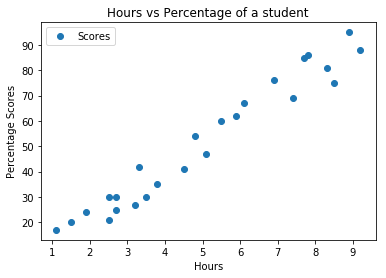

In [11]:
#Now visualizing these numerical values with the help of scattter plot
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage of a student")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.show()

####  Spliting the dataset

In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,1]



In [20]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred=model.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

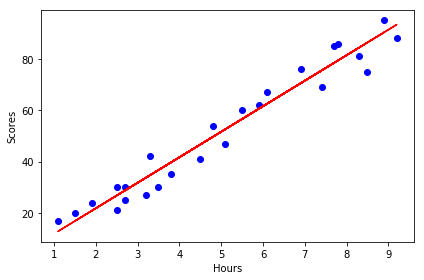

In [26]:
line = model.coef_*X+model.intercept_
plt.scatter(X,y, color="blue")
plt.plot(X,line, color="red")
plt.xlabel("Hours")  
plt.ylabel("Scores")  
plt.tight_layout()
plt.show()


In [28]:
df1=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df1

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


#### Predicting Values

In [34]:
hours=9.25
test_pred=model.predict(np.array(hours).reshape(-1, 1))
print("No.Of Hours={}".format(hours))
print("Predicted Score={}".format(test_pred[0]))

No.Of Hours=9.25
Predicted Score=93.89272889341655


####  Calcultaing Error

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Sqaured Error: %.2f" % mean_squared_error(y_test, y_pred))

Mean Sqaured Error: 20.33


In [41]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.13
